<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Libraries</h3>

</div>

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix , classification_report 
from imblearn.over_sampling import RandomOverSampler 
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score


<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Read dataset</h3>

</div>

In [18]:
df = pd.read_csv("diabetes(253k,22).csv")

<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Data Exploration (EDA - Exploratory Data Analysis)</h3>

</div>

In [19]:
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
8,2,1,1,1,30,1,0,1,0,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,...,1,0,2,0,0,0,1,8,4,3


In [20]:
df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0,1,1,1,45,0,0,0,0,1,...,1,0,3,0,5,0,1,5,6,7
253676,2,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4
253677,0,0,0,1,28,0,0,0,1,1,...,1,0,1,0,0,0,0,2,5,2
253678,0,1,0,1,23,0,0,0,0,1,...,1,0,3,0,0,0,1,7,5,1
253679,2,1,1,1,25,0,0,1,1,1,...,1,0,2,0,0,0,0,9,6,2


In [21]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

Diabetes_012: 3 unique values
HighBP: 2 unique values
HighChol: 2 unique values
CholCheck: 2 unique values
BMI: 84 unique values
Smoker: 2 unique values
Stroke: 2 unique values
HeartDiseaseorAttack: 2 unique values
PhysActivity: 2 unique values
Fruits: 2 unique values
Veggies: 2 unique values
HvyAlcoholConsump: 2 unique values
AnyHealthcare: 2 unique values
NoDocbcCost: 2 unique values
GenHlth: 5 unique values
MentHlth: 31 unique values
PhysHlth: 31 unique values
DiffWalk: 2 unique values
Sex: 2 unique values
Age: 13 unique values
Education: 6 unique values
Income: 8 unique values


<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">missing values</h3>

</div>


In [22]:
print(f'missing values: \n{(df.isnull().sum()/df.shape[0])*100}' )

missing values: 
Diabetes_012            0.0
HighBP                  0.0
HighChol                0.0
CholCheck               0.0
BMI                     0.0
Smoker                  0.0
Stroke                  0.0
HeartDiseaseorAttack    0.0
PhysActivity            0.0
Fruits                  0.0
Veggies                 0.0
HvyAlcoholConsump       0.0
AnyHealthcare           0.0
NoDocbcCost             0.0
GenHlth                 0.0
MentHlth                0.0
PhysHlth                0.0
DiffWalk                0.0
Sex                     0.0
Age                     0.0
Education               0.0
Income                  0.0
dtype: float64


<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Duplicated</h3>

</div>


In [23]:
print(f'duplicated: { df.duplicated().sum() }' )

duplicated: 23899


In [24]:
df.drop_duplicates(inplace = True)

In [25]:
print(f'Dublicated: {df.duplicated().sum()}')

Dublicated: 0


<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Analyze Data Distribution & Summary</h3>

</div>

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 229781 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          229781 non-null  int64
 1   HighBP                229781 non-null  int64
 2   HighChol              229781 non-null  int64
 3   CholCheck             229781 non-null  int64
 4   BMI                   229781 non-null  int64
 5   Smoker                229781 non-null  int64
 6   Stroke                229781 non-null  int64
 7   HeartDiseaseorAttack  229781 non-null  int64
 8   PhysActivity          229781 non-null  int64
 9   Fruits                229781 non-null  int64
 10  Veggies               229781 non-null  int64
 11  HvyAlcoholConsump     229781 non-null  int64
 12  AnyHealthcare         229781 non-null  int64
 13  NoDocbcCost           229781 non-null  int64
 14  GenHlth               229781 non-null  int64
 15  MentHlth              229781 non-null  

In [27]:
df.shape

(229781, 22)

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,229781.0,0.325627,0.724623,0.0,0.0,0.0,0.0,2.0
HighBP,229781.0,0.454441,0.497921,0.0,0.0,0.0,1.0,1.0
HighChol,229781.0,0.441760,0.496598,0.0,0.0,0.0,1.0,1.0
CholCheck,229781.0,0.959535,0.197047,0.0,1.0,1.0,1.0,1.0
BMI,229781.0,28.685670,6.786360,12.0,24.0,27.0,32.0,98.0
Smoker,229781.0,0.465661,0.498821,0.0,0.0,0.0,1.0,1.0
Stroke,229781.0,0.044756,0.206767,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,229781.0,0.103216,0.304241,0.0,0.0,0.0,0.0,1.0
PhysActivity,229781.0,0.733355,0.442206,0.0,0.0,1.0,1.0,1.0
Fruits,229781.0,0.612966,0.487073,0.0,0.0,1.0,1.0,1.0


In [29]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

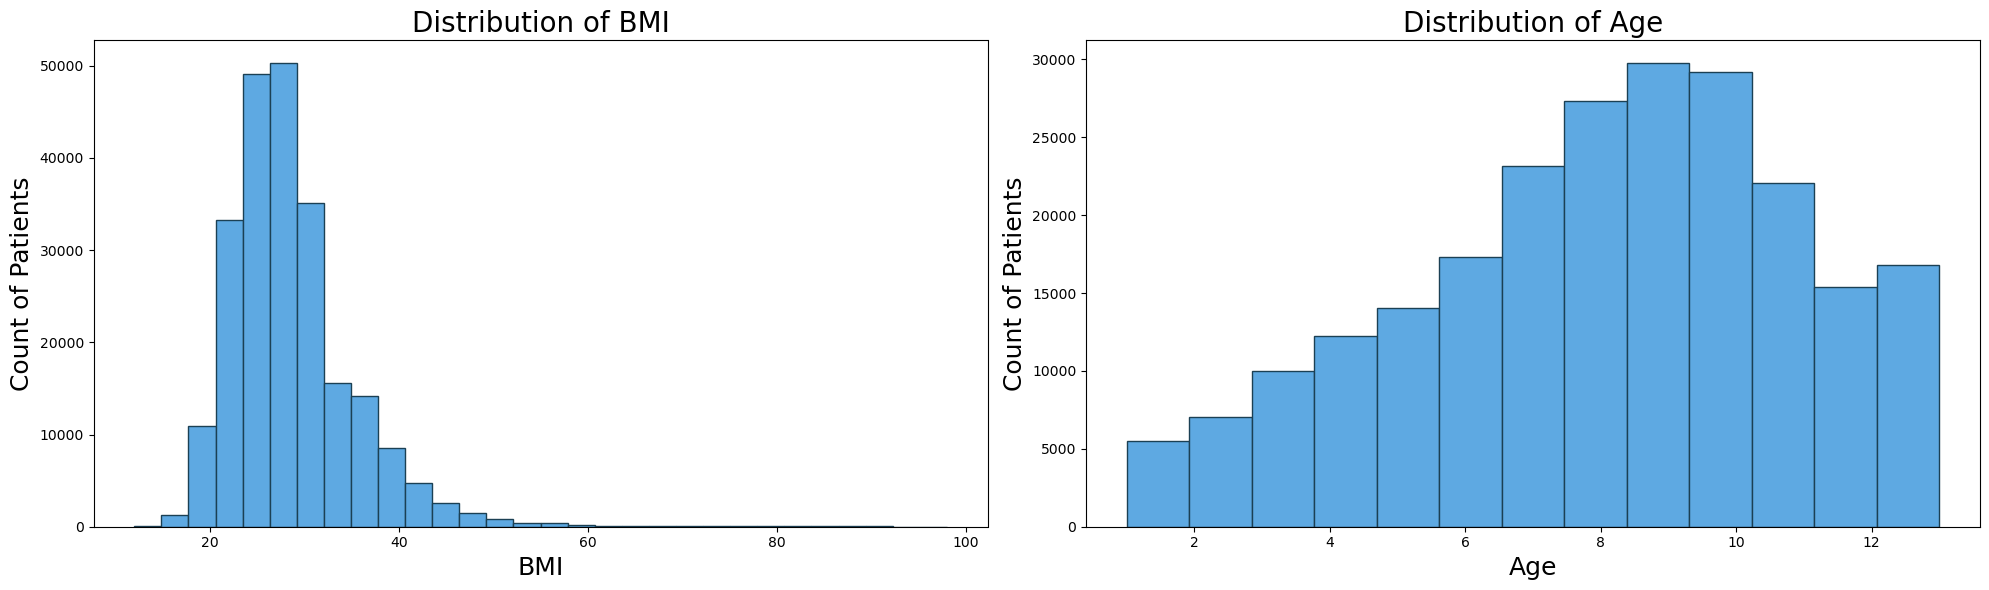

In [30]:
plt.figure(figsize=(20,6))

plt.subplot(1, 2, 1)
plt.hist(df['BMI'], color="#5ea9e2", bins=30, edgecolor="#1b4054")
plt.xlabel("BMI", fontsize=18)
plt.ylabel("Count of Patients", fontsize=18)
plt.title("Distribution of BMI", fontsize=20)

plt.subplot(1, 2, 2)
plt.hist(df['Age'], color="#5ea9e2", bins=13, edgecolor="#1b4054")
plt.xlabel("Age", fontsize=18)
plt.ylabel("Count of Patients", fontsize=18)
plt.title("Distribution of Age", fontsize=20)


plt.tight_layout()
plt.show()


In [31]:
df["Diabetes_012"].value_counts()

Diabetes_012
0    190055
2     35097
1      4629
Name: count, dtype: int64

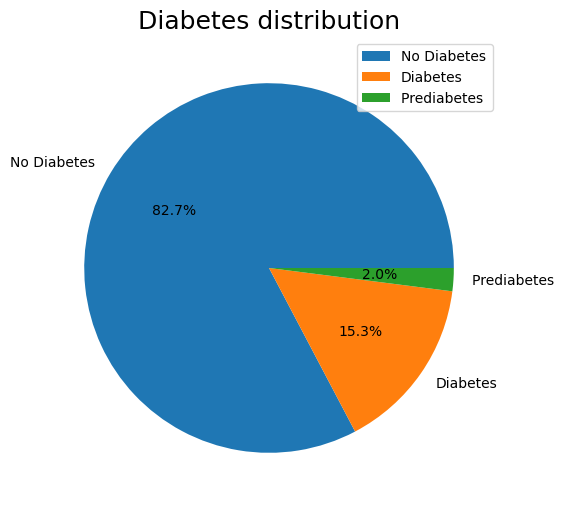

In [32]:
plt.figure(figsize=(20,6))
labels = ["No Diabetes"  ,"Diabetes","Prediabetes " ]

plt.subplot(1,2,1)
plt.pie(df["Diabetes_012"].value_counts() ,labels=labels ,autopct="%1.1f%%" )
plt.legend(loc = 1)
plt.title("Diabetes distribution" ,fontsize = 18)

plt.show()

<Figure size 1200x600 with 0 Axes>

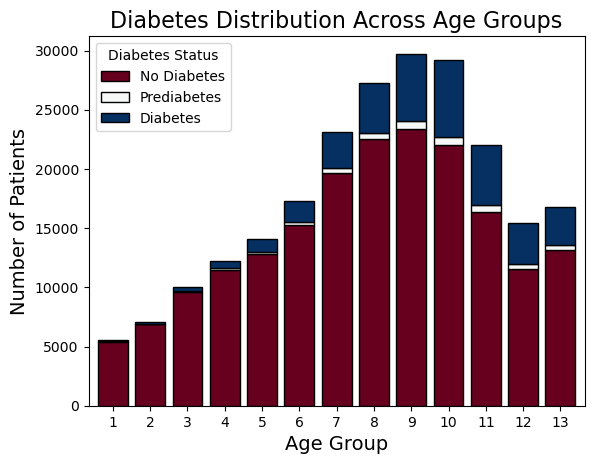

In [33]:

plt.figure(figsize=(12, 6))

age_diabetes_counts = df.groupby("Age")["Diabetes_012"].value_counts().unstack()
age_diabetes_counts.plot(kind="bar", stacked=True, colormap='RdBu', edgecolor="black", width=0.8 )

plt.xlabel("Age Group", fontsize=14 )
plt.ylabel("Number of Patients", fontsize=14)
plt.title("Diabetes Distribution Across Age Groups", fontsize=16)
plt.legend(title="Diabetes Status", labels=["No Diabetes", "Prediabetes", "Diabetes"])
plt.xticks(rotation=0)

plt.show()


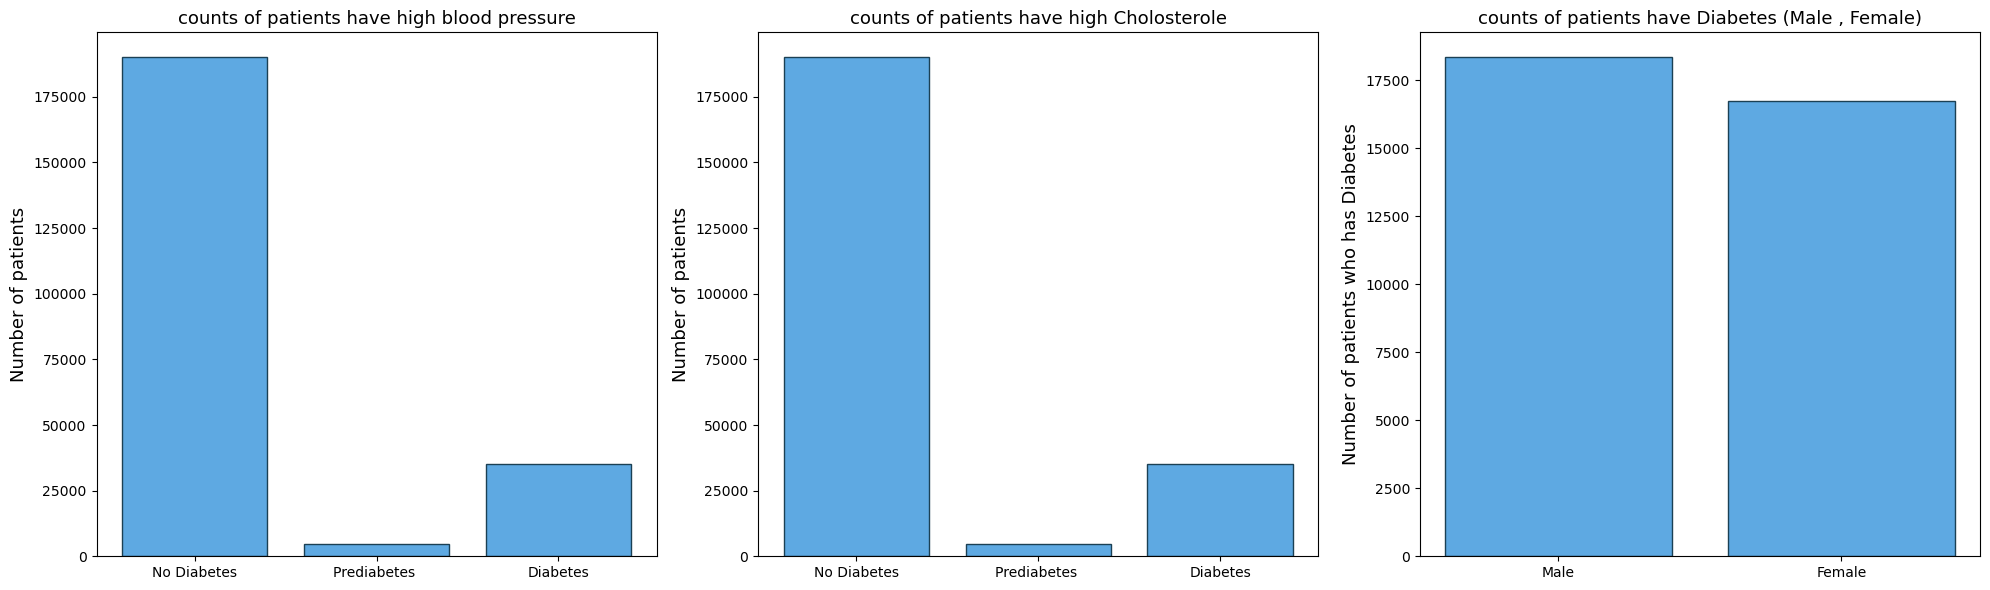

In [34]:
highBP_counts = df.groupby('Diabetes_012')['HighBP'].count()
highchol_counts = df.groupby('Diabetes_012')['HighChol'].count()
Gender_counts = df.groupby("Diabetes_012")['Sex'].value_counts()
labels = ["No Diabetes"  ,"Prediabetes ","Diabetes" ]

plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.bar(labels ,highBP_counts.values,color="#5ea9e2", edgecolor="#1b4054" )
plt.ylabel("Number of patients" , fontsize = 13)
plt.title("counts of patients have high blood pressure", fontsize = 13)\

plt.subplot(1,3,2)
plt.bar(labels ,highchol_counts.values,color="#5ea9e2", edgecolor="#1b4054" )
plt.ylabel("Number of patients" , fontsize = 13)
plt.title("counts of patients have high Cholosterole", fontsize = 13)

plt.subplot(1,3,3)
plt.bar(["Male" , "Female"],Gender_counts[2].values, color ='#5ea9e2' ,edgecolor="#1b4054")
plt.ylabel("Number of patients who has Diabetes" , fontsize = 13)
plt.title("counts of patients have Diabetes (Male , Female)", fontsize = 13)
plt.tight_layout()
plt.show()

<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Detect Outliers</h3>

</div> 

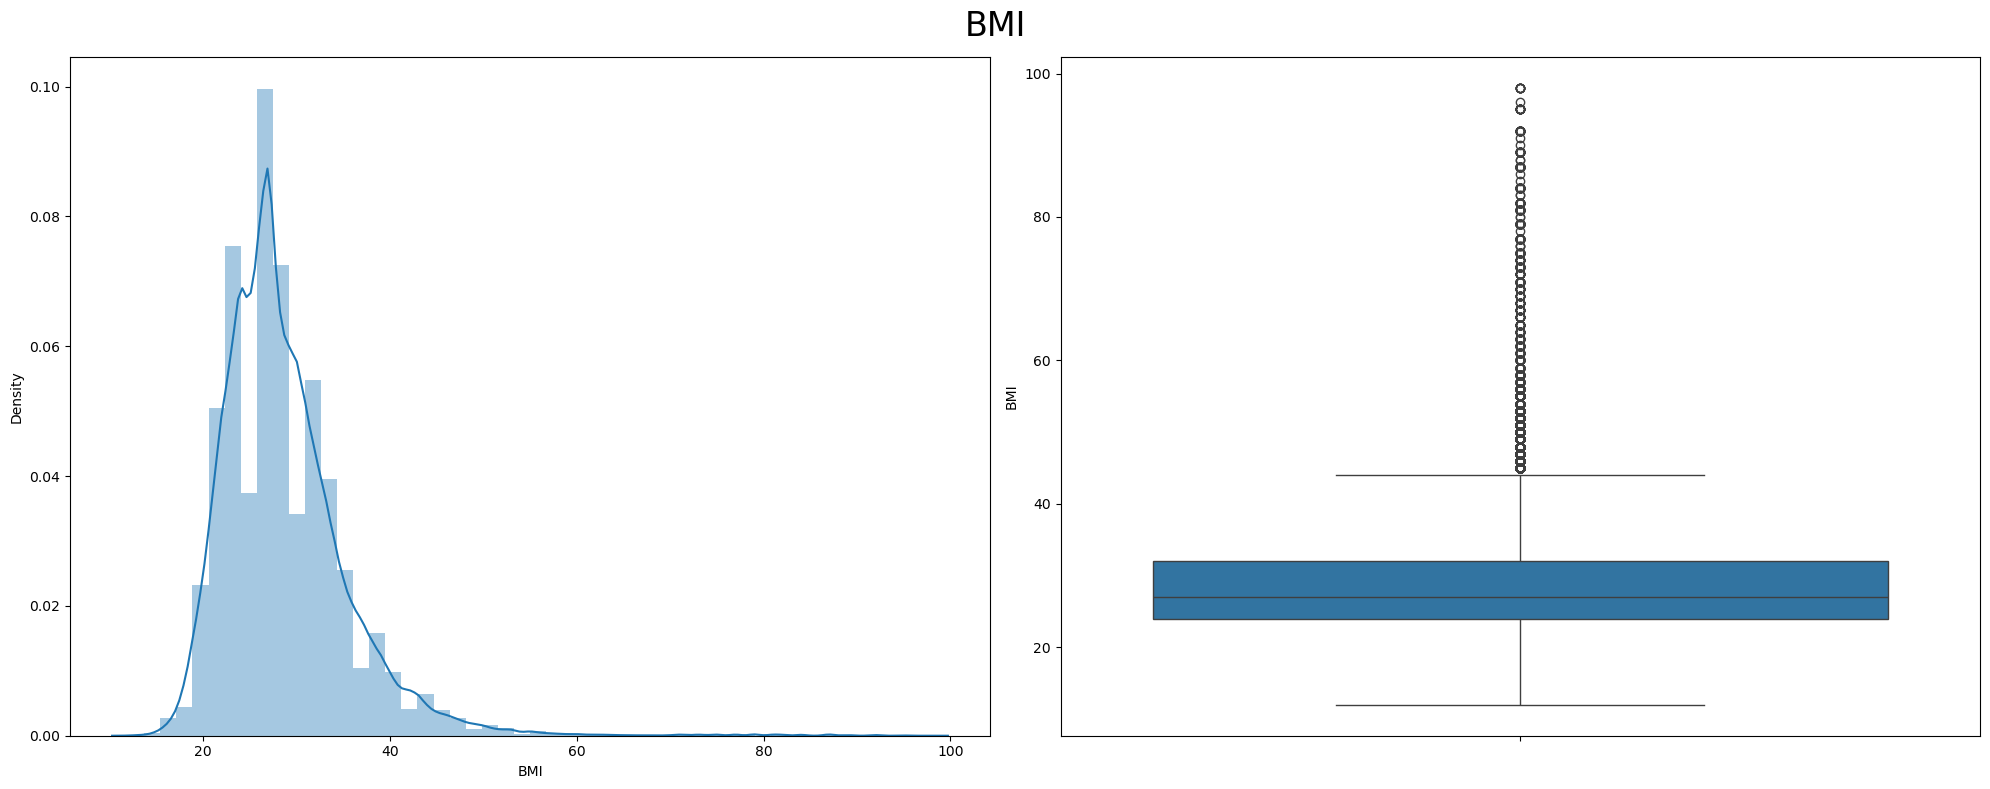

In [35]:
plt.figure(figsize=(20, 8))
plt.subplot(1,2,1)
sns.distplot(df['BMI'] )
plt.subplot(1,2,2)
sns.boxplot(df['BMI'] )

plt.suptitle('BMI', fontsize = 24)
plt.tight_layout()
plt.show()

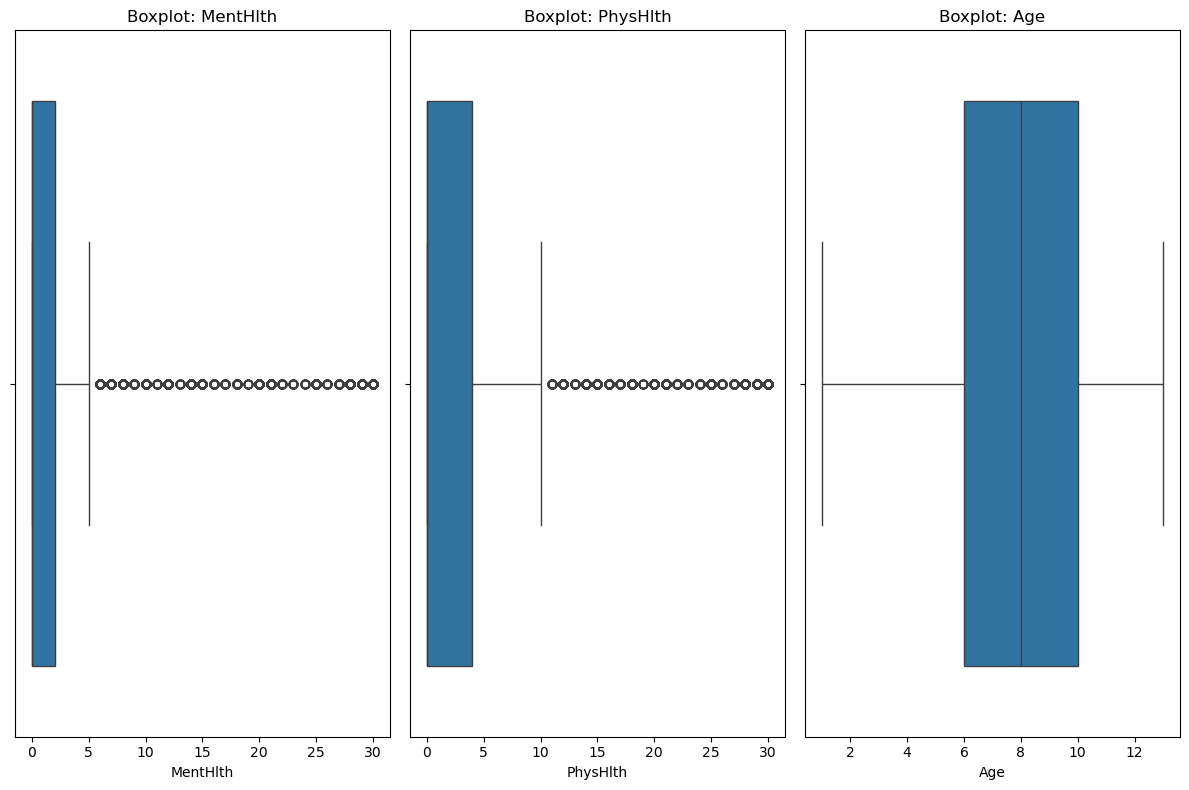

In [36]:
selected_columns = [ 'MentHlth', 'PhysHlth', 'Age']
n_rows, n_cols = 1, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 8))
axes = axes.flatten()

for i, column in enumerate(selected_columns):
    sns.boxplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f"Boxplot: {column}")
plt.tight_layout()
plt.show()

In [37]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw



In [38]:
wisker(df['BMI'])



(12.0, 44.0)

In [39]:
wisker(df['PhysHlth'])

(-6.0, 10.0)

In [40]:
wisker(df['MentHlth'])

(-3.0, 5.0)

In [41]:
for i in ['BMI' ,'PhysHlth' ,'MentHlth']:
    lw,uw=wisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i])

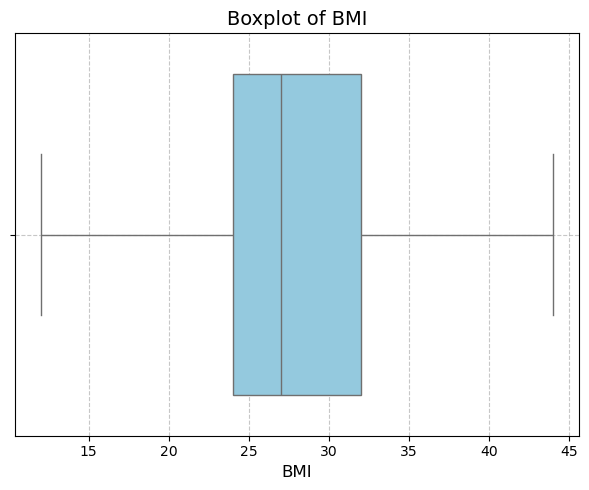

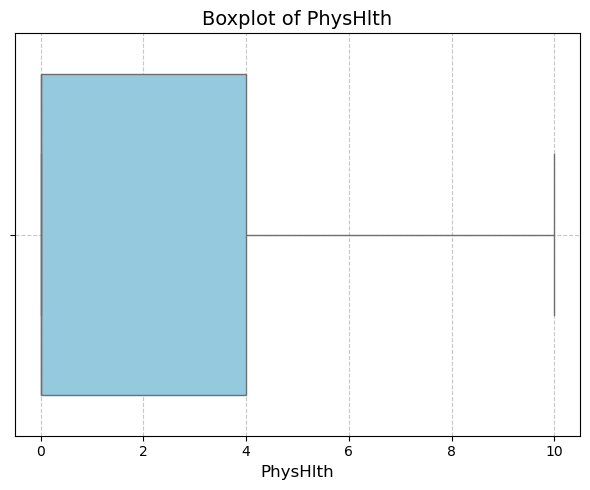

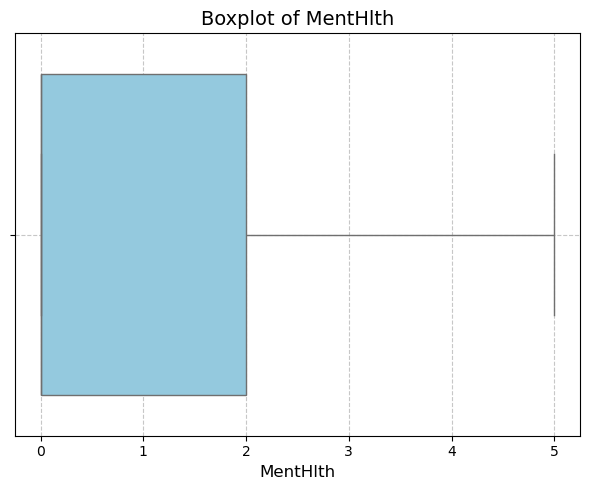

In [42]:
for column in ['BMI', 'PhysHlth', 'MentHlth']:
    plt.figure(figsize=(6, 5))
    sns.boxplot(x=df[column], color='skyblue')
    plt.title(f"Boxplot of {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [43]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40.0,1,0,0,0,0,...,1,0,5,5.0,10.0,1,0,9,4,3
1,0,0,0,0,25.0,1,0,0,1,0,...,0,1,3,0.0,0.0,0,0,7,6,1
2,0,1,1,1,28.0,0,0,0,0,1,...,1,1,5,5.0,10.0,1,0,9,4,8
3,0,1,0,1,27.0,0,0,0,1,1,...,1,0,2,0.0,0.0,0,0,11,3,6
4,0,1,1,1,24.0,0,0,0,1,1,...,1,0,2,3.0,0.0,0,0,11,5,4


In [44]:
df.drop(['Income', 'Education'], axis=1, inplace=True)


In [45]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age'],
      dtype='object')

In [46]:
X = df.drop(['Diabetes_012'] , axis= 1)
y = df['Diabetes_012']

In [47]:
print(X.shape)
print('='*100)
cols = X.columns

(229781, 19)


In [48]:
y.shape

(229781,)

In [49]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= 0.2 , random_state = 42)

<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">tried the scaler, but it didn’t give a result.</h3>

</div> 

In [50]:
# scaler = StandardScaler()
# X_train[['BMI', 'Age', 'MentHlth', 'PhysHlth']] = scaler.fit_transform(X_train[['BMI', 'Age', 'MentHlth', 'PhysHlth']])
# X_test[['BMI', 'Age', 'MentHlth', 'PhysHlth']] = scaler.transform(X_test[['BMI', 'Age', 'MentHlth','PhysHlth']])

In [51]:
# scaler = StandardScaler()
# X_train['BMI'] = scaler.fit_transform(X_train[['BMI']])
# X_test['BMI']= scaler.transform(X_test[['BMI']])

In [52]:
# X_train['Age'] = scaler.fit_transform(X_train[['Age']])
# X_test['Age']= scaler.transform(X_test[['Age']])

In [53]:
# X_train['MentHlth'] = scaler.fit_transform(X_train[['MentHlth']])
# X_test['MentHlth']= scaler.transform(X_test[['MentHlth']])

In [54]:
# X_train['PhysHlth'] = scaler.fit_transform(X_train[['PhysHlth']])
# X_test['PhysHlth']= scaler.transform(X_test[['PhysHlth']])

In [55]:
X_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
54836,1,1,1,31.0,0,0,0,1,0,1,0,1,0,2,0.0,0.0,0,0,11
181656,0,0,1,24.0,0,0,0,1,1,1,0,1,1,2,4.0,0.0,0,0,8
40018,1,0,1,22.0,1,0,1,1,1,1,0,1,0,2,0.0,0.0,0,1,13
213712,0,0,1,29.0,1,0,0,0,0,1,0,0,1,4,5.0,0.0,0,0,7
121473,1,0,1,30.0,0,0,0,1,1,1,0,1,0,1,0.0,0.0,0,1,5


In [56]:
y.value_counts()

Diabetes_012
0    190055
2     35097
1      4629
Name: count, dtype: int64

<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Impalance data Treatment</h3>

</div>  

In [57]:
over_sampler = RandomOverSampler(sampling_strategy= 'not majority')


In [58]:
features_over_sample, label_over_sample = over_sampler.fit_resample(X, y)


In [59]:
label_over_sample.value_counts()


Diabetes_012
0    190055
2    190055
1    190055
Name: count, dtype: int64

In [60]:
x_train_ros, x_test_ros, y_train_ros, y_test_ros= train_test_split(features_over_sample, label_over_sample, test_size = 0.25)


<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Logistic regression</h3>

</div>  

In [61]:
Log_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
Log_model.fit(x_train_ros , y_train_ros)



LogisticRegression(max_iter=1000, multi_class='multinomial')

In [62]:
y_pred_1 = Log_model.predict(x_test_ros)

In [63]:
cm_log = confusion_matrix( y_test_ros ,y_pred_1 )

<Axes: >

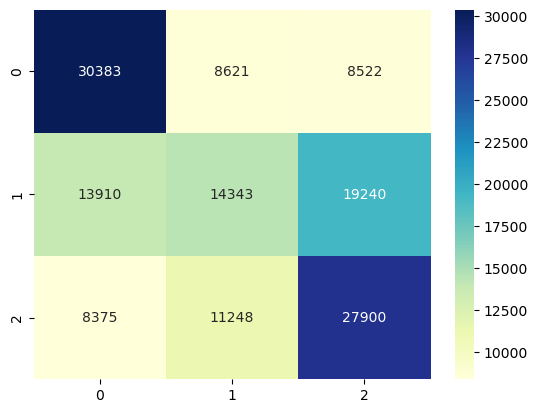

In [64]:
sns.heatmap(cm_log , annot= True,  fmt='d', cmap='YlGnBu')

In [65]:
print(classification_report(y_test_ros, y_pred_1))

              precision    recall  f1-score   support

           0       0.58      0.64      0.61     47526
           1       0.42      0.30      0.35     47493
           2       0.50      0.59      0.54     47523

    accuracy                           0.51    142542
   macro avg       0.50      0.51      0.50    142542
weighted avg       0.50      0.51      0.50    142542



<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Random forest that is the winning model that was used during</h3>

</div>  

In [66]:
Rndf_model = RandomForestClassifier()
Rndf_model.fit(x_train_ros , y_train_ros)

RandomForestClassifier()

In [67]:
y_pred_2 = Rndf_model.predict(x_test_ros)

In [68]:
cm = confusion_matrix( y_test_ros ,y_pred_2)

<Axes: >

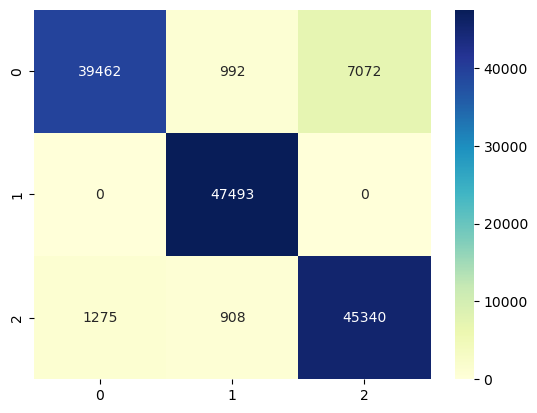

In [69]:
sns.heatmap(cm , annot= True,  fmt='d', cmap='YlGnBu')

In [70]:
x_train_ros.shape

(427623, 19)

In [71]:
print(classification_report(y_test_ros , y_pred_2))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89     47526
           1       0.96      1.00      0.98     47493
           2       0.87      0.95      0.91     47523

    accuracy                           0.93    142542
   macro avg       0.93      0.93      0.93    142542
weighted avg       0.93      0.93      0.93    142542



In [72]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,1,40.0,1,0,0,0,0,1,0,1,0,5,5.0,10.0,1,0,9
1,0,0,0,0,25.0,1,0,0,1,0,0,0,0,1,3,0.0,0.0,0,0,7
2,0,1,1,1,28.0,0,0,0,0,1,0,0,1,1,5,5.0,10.0,1,0,9
3,0,1,0,1,27.0,0,0,0,1,1,1,0,1,0,2,0.0,0.0,0,0,11
4,0,1,1,1,24.0,0,0,0,1,1,1,0,1,0,2,3.0,0.0,0,0,11


In [73]:
# check overfitting


# 3. Predict on training and test data
y_train_pred_rf = Rndf_model.predict(x_train_ros)

# 4. Compute accuracy
train_acc = accuracy_score(y_train_ros, y_train_pred_rf)
test_acc = accuracy_score(y_test_ros, y_pred_2)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Training Accuracy: 96.92%
Test Accuracy: 92.81%


<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Xgboost</h3>

</div>  

In [74]:
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',  # or 'multi:softprob'
    num_class=3,                # Change this to the number of your classes
    eval_metric='mlogloss',     # Multi-class log loss
    use_label_encoder=False,    # Avoid warnings
    random_state=42             # For reproducibility
)
xgb_model.fit(x_train_ros,y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3, ...)

In [75]:
y_pred_3 = xgb_model.predict(x_test_ros)

In [76]:
cm_xgb = confusion_matrix( y_test_ros ,y_pred_3)


<Axes: >

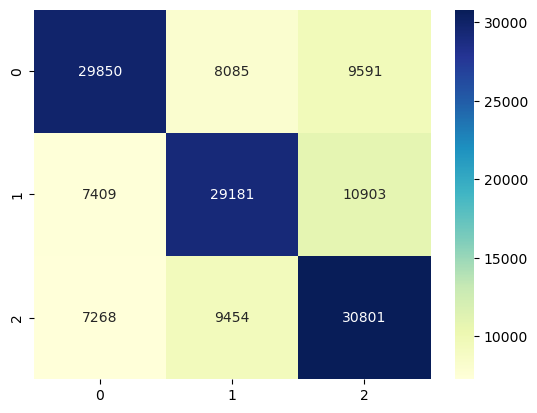

In [77]:
sns.heatmap(cm_xgb , annot= True,  fmt='d', cmap='YlGnBu')


In [78]:
print(classification_report(y_test_ros , y_pred_3))


              precision    recall  f1-score   support

           0       0.67      0.63      0.65     47526
           1       0.62      0.61      0.62     47493
           2       0.60      0.65      0.62     47523

    accuracy                           0.63    142542
   macro avg       0.63      0.63      0.63    142542
weighted avg       0.63      0.63      0.63    142542



In [79]:
x_train_ros.shape

(427623, 19)

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(x_train_ros, y_train_ros)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Best Accuracy:", grid_search.best_score_)


<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">MLP</h3>

</div>   

In [84]:
model = Sequential([
    Dense(64, input_shape=(x_train_ros.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3-class classification
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [81]:
model.fit(x_train_ros, y_train_ros, epochs=10, batch_size=64, validation_split=0.2)


NameError: name 'model' is not defined

In [ ]:
loss, accuracy = model.evaluate(x_test_ros, y_test_ros)
print("Test Accuracy:", accuracy)

4455/4455 ━━━━━━━━━━━━━━━━━━━━ 3s 781us/step - accuracy: 0.5353 - loss: 0.9345
Test Accuracy: 0.5352597832679749


<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Xgboost inhanced</h3>

</div>  

In [85]:
xgb_model_best = xgb.XGBClassifier(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 10, min_child_weight = 1, n_estimators = 300, scale_pos_weight= 1, subsample= 0.7)
xgb_model_best.fit(x_train_ros,y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [87]:
y_pred_4 = xgb_model_best.predict(x_test_ros)


In [88]:
cm_xgb_2 = confusion_matrix( y_test_ros ,y_pred_4)


<Axes: >

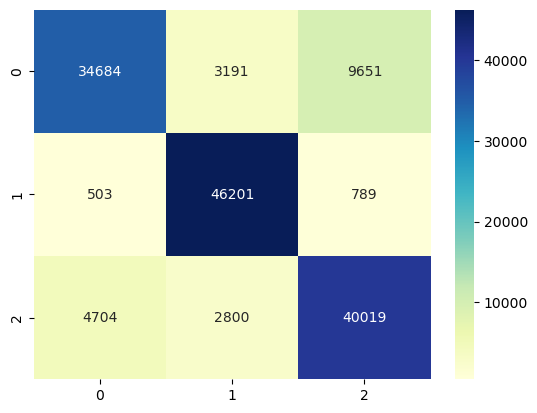

In [89]:
sns.heatmap(cm_xgb_2 , annot= True,  fmt='d', cmap='YlGnBu')


In [90]:
print(classification_report(y_test_ros , y_pred_4))


              precision    recall  f1-score   support

           0       0.87      0.73      0.79     47526
           1       0.89      0.97      0.93     47493
           2       0.79      0.84      0.82     47523

    accuracy                           0.85    142542
   macro avg       0.85      0.85      0.85    142542
weighted avg       0.85      0.85      0.85    142542



In [91]:
# check overfitting

# 3. Predict on training and test data
y_train_pred = xgb_model_best.predict(x_train_ros)

# 4. Compute accuracy
train_acc = accuracy_score(y_train_ros, y_train_pred)
test_acc = accuracy_score(y_test_ros, y_pred_4)

print(f"Training Accuracy: {train_acc * 100:.2f}%")
print(f"Test Accuracy: {test_acc * 100:.2f}%")


Training Accuracy: 87.87%
Test Accuracy: 84.82%


In [92]:
y.value_counts()

Diabetes_012
0    190055
2     35097
1      4629
Name: count, dtype: int64

<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Method 2:</h3>

</div>     

In [93]:
under_sampler = RandomUnderSampler(sampling_strategy= {0:35097})
fetures_under_sample , label_under_sample = under_sampler.fit_resample(X, y)

In [94]:
label_under_sample.value_counts()

Diabetes_012
0    35097
2    35097
1     4629
Name: count, dtype: int64

In [95]:
over_sampler_afetr_under_sampler = RandomOverSampler(sampling_strategy='minority')
features_final_sample , label_final_sample = over_sampler_afetr_under_sampler.fit_resample(fetures_under_sample , label_under_sample)

In [96]:
label_final_sample.value_counts()

Diabetes_012
0    35097
1    35097
2    35097
Name: count, dtype: int64

In [97]:
x_train_final, x_test_final, y_train_final, y_test_final= train_test_split(features_final_sample , label_final_sample, test_size = 0.2)


<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Random forest</h3>

</div>  

In [98]:
Rndf_model_impalance= RandomForestClassifier()
Rndf_model_impalance.fit(x_train_final , y_train_final)

RandomForestClassifier()

In [99]:
y_pred_5 = Rndf_model_impalance.predict(x_test_final)


In [100]:
cm_rf = confusion_matrix(y_test_final , y_pred_5)

<Axes: >

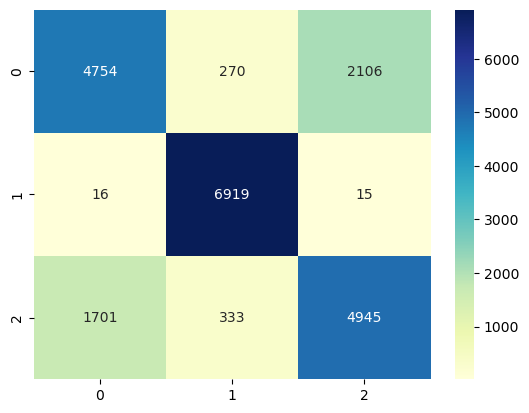

In [101]:
sns.heatmap(cm_rf , annot= True,  fmt='d', cmap='YlGnBu')


In [102]:
print(classification_report(y_test_final , y_pred_5))

              precision    recall  f1-score   support

           0       0.73      0.67      0.70      7130
           1       0.92      1.00      0.96      6950
           2       0.70      0.71      0.70      6979

    accuracy                           0.79     21059
   macro avg       0.78      0.79      0.79     21059
weighted avg       0.78      0.79      0.79     21059



In [103]:
# check overfitting


# 3. Predict on training and test data
y_train_pred_rf_imbalance = Rndf_model.predict(x_train_final)

# 4. Compute accuracy
train_acc_im = accuracy_score(y_train_final, y_train_pred_rf_imbalance)
test_acc_im = accuracy_score(y_test_final, y_pred_5)

print(f"Training Accuracy: {train_acc_im * 100:.2f}%")
print(f"Test Accuracy: {test_acc_im * 100:.2f}%")


Training Accuracy: 95.67%
Test Accuracy: 78.91%


In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [ 10, 20],
    'min_samples_split': [ 5, 10],
    'min_samples_leaf': [ 2, 4],
    'max_features': ['sqrt'],
    'bootstrap': [True]
}
grid_search = GridSearchCV(estimator=Rndf_model_impalance,
                           param_grid=param_grid_rf,
                           scoring='accuracy',
                           cv=3,
                           verbose=2,
                           n_jobs=-1)
grid_search.fit(x_train_final, y_train_final)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Accuracy: 0.752089513767808


<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Xgboost small data</h3>

</div>   

In [104]:
xgb_model_imbalance = xgb.XGBClassifier()
xgb_model_imbalance.fit(x_train_final,y_train_final)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [105]:
y_pred_6 = xgb_model_imbalance.predict(x_test_final)


In [106]:
cm_xgb_3 = confusion_matrix(y_test_final , y_pred_6)


<Axes: >

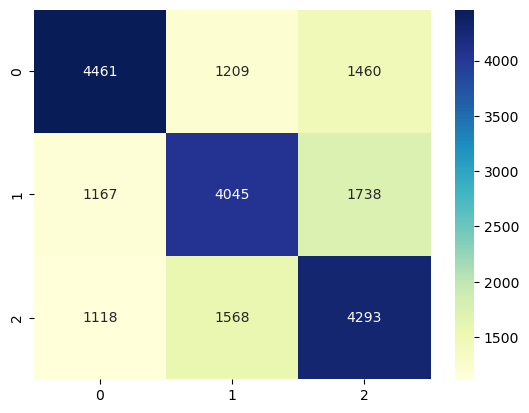

In [107]:
sns.heatmap(cm_xgb_3 , annot= True,  fmt='d', cmap='YlGnBu')


In [108]:
print(classification_report(y_test_final , y_pred_6))


              precision    recall  f1-score   support

           0       0.66      0.63      0.64      7130
           1       0.59      0.58      0.59      6950
           2       0.57      0.62      0.59      6979

    accuracy                           0.61     21059
   macro avg       0.61      0.61      0.61     21059
weighted avg       0.61      0.61      0.61     21059



In [109]:
# check overfitting


# 3. Predict on training and test data
y_train_pred_xgb_imbalance = xgb_model_imbalance.predict(x_train_final)

# 4. Compute accuracy
train_acc_im = accuracy_score(y_train_final, y_train_pred_xgb_imbalance)
test_acc_im = accuracy_score(y_test_final, y_pred_6)

print(f"Training Accuracy: {train_acc_im * 100:.2f}%")
print(f"Test Accuracy: {test_acc_im * 100:.2f}%")


Training Accuracy: 65.06%
Test Accuracy: 60.78%


In [110]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'scale_pos_weight': [1, 3, 5]
}

grid_search = GridSearchCV(estimator=xgb_model_imbalance, param_grid=param_grid, scoring='accuracy', cv=3, verbose=1)
grid_search.fit(x_train_final, y_train_final)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Best Accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 2187 candidates, totalling 6561 fits


KeyboardInterrupt: 

<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Xgboost small data inhanced</h3>

</div>   

In [111]:
xgb_model_imbalance_best = xgb.XGBClassifier(colsample_bytree= 1.0, learning_rate= 0.1, max_depth= 10, min_child_weight= 1, n_estimators= 300, scale_pos_weight= 1, subsample= 0.7)
xgb_model_imbalance_best.fit(x_train_final,y_train_final)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, ...)

In [112]:
y_pred_7 = xgb_model_imbalance_best.predict(x_test_final)


In [113]:
cm_xgb_4= confusion_matrix(y_test_final , y_pred_7)


<Axes: >

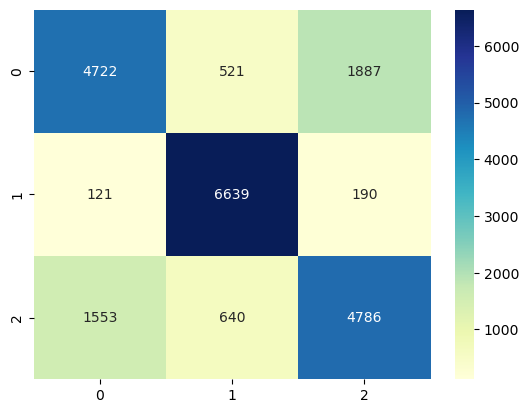

In [114]:
sns.heatmap(cm_xgb_4 , annot= True,  fmt='d', cmap='YlGnBu')


In [115]:
print(classification_report(y_test_final , y_pred_7))


              precision    recall  f1-score   support

           0       0.74      0.66      0.70      7130
           1       0.85      0.96      0.90      6950
           2       0.70      0.69      0.69      6979

    accuracy                           0.77     21059
   macro avg       0.76      0.77      0.76     21059
weighted avg       0.76      0.77      0.76     21059



In [116]:
# check overfitting


# 3. Predict on training and test data
y_train_pred_xgb_imbalance_best = xgb_model_imbalance_best.predict(x_train_final)

# 4. Compute accuracy
train_acc_im_best = accuracy_score(y_train_final, y_train_pred_xgb_imbalance_best)
test_acc_im_best = accuracy_score(y_test_final, y_pred_7)

print(f"Training Accuracy: {train_acc_im_best * 100:.2f}%")
print(f"Test Accuracy: {test_acc_im_best * 100:.2f}%")


Training Accuracy: 91.07%
Test Accuracy: 76.68%


<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">make the pkl</h3>

</div>   

In [ ]:
import joblib
joblib.dump(Rndf_model, 'random_forest_model.pkl')




['random_forest_model.pkl']

In [ ]:
df

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
0,0,1,1,1,40.0,1,0,0,0,0,1,0,1,0,5,5.0,10.0,1,0,9
1,0,0,0,0,25.0,1,0,0,1,0,0,0,0,1,3,0.0,0.0,0,0,7
2,0,1,1,1,28.0,0,0,0,0,1,0,0,1,1,5,5.0,10.0,1,0,9
3,0,1,0,1,27.0,0,0,0,1,1,1,0,1,0,2,0.0,0.0,0,0,11
4,0,1,1,1,24.0,0,0,0,1,1,1,0,1,0,2,3.0,0.0,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0,1,1,1,44.0,0,0,0,0,1,1,0,1,0,3,0.0,5.0,0,1,5
253676,2,1,1,1,18.0,0,0,0,0,0,0,0,1,0,4,0.0,0.0,1,0,11
253677,0,0,0,1,28.0,0,0,0,1,1,0,0,1,0,1,0.0,0.0,0,0,2
253678,0,1,0,1,23.0,0,0,0,0,1,1,0,1,0,3,0.0,0.0,0,1,7


<div style="
    background: #f8fafc;
    border-radius: 8px;
    padding: 16px;
    margin: 12px 0;
    border-left: 4px solid #7dd3fc;
    font-family: 'Segoe UI', sans-serif;
">
<h3 style="margin-top: 0; color: #0369a1;">Model check</h3>

</div>   

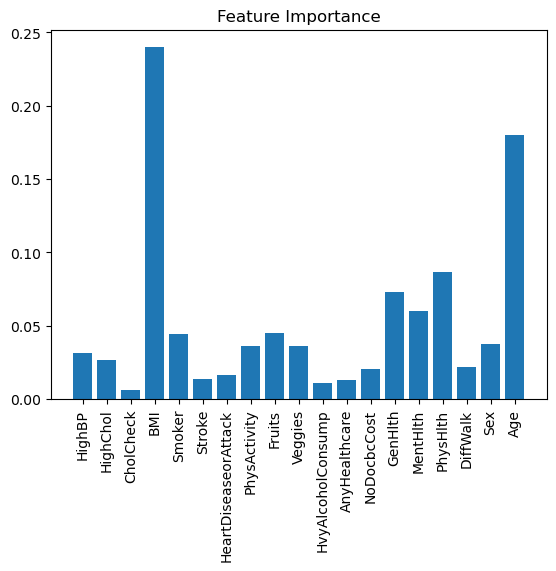

In [117]:
importance = Rndf_model.feature_importances_
plt.bar(df.drop('Diabetes_012',axis = 1).columns, importance)
plt.title("Feature Importance")
plt.xticks(rotation =90)
plt.show()

In [ ]:
Rndf_model.predict([[1,	1	,1,	33,	0,	0,	0,	0,	0,	1,	0,	1,	0,	3,	3,	0,	0,	1,	7,]])

array([1], dtype=int64)

In [ ]:
len([1,1,1,20,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9])

19